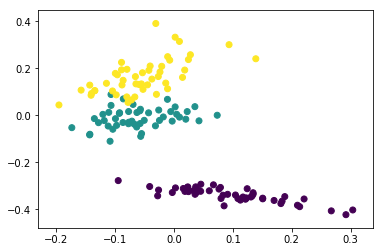

In [1]:
import sys
sys.path.append('../Modules')

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
%matplotlib inline

from PCA import Autoencoder

iris = datasets.load_iris()

autoencoder = Autoencoder(4, 3, 2)
autoencoder.fit(iris.data, 10000, 1e-3)

Z = autoencoder.transform(iris.data)
plt.scatter(Z[:, 0], Z[:, 1], c=iris.target)
plt.show()

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.read_csv('https://raw.githubusercontent.com/ming-zhao/Machine-Learning/master/Data/train.zip', 
                 compression='zip', header=0)

from keras.layers import Input, Dense
from keras.models import Model
from sklearn.model_selection import train_test_split

(29400, 784)
(12600, 784)
Train on 29400 samples, validate on 12600 samples
Epoch 1/50
29400/29400 [==============================] - 2s 71us/step - loss: 0.4427 - val_loss: 0.2846
Epoch 2/50
29400/29400 [==============================] - 2s 61us/step - loss: 0.2779 - val_loss: 0.2735
Epoch 3/50
29400/29400 [==============================] - 2s 61us/step - loss: 0.2707 - val_loss: 0.2675
Epoch 4/50
29400/29400 [==============================] - 2s 61us/step - loss: 0.2639 - val_loss: 0.2594
Epoch 5/50
29400/29400 [==============================] - 2s 62us/step - loss: 0.2542 - val_loss: 0.2483
Epoch 6/50
29400/29400 [==============================] - 2s 65us/step - loss: 0.2426 - val_loss: 0.2366
Epoch 7/50
29400/29400 [==============================] - 2s 62us/step - loss: 0.2314 - val_loss: 0.2263
Epoch 8/50
29400/29400 [==============================] - 2s 71us/step - loss: 0.2219 - val_loss: 0.2177
Epoch 9/50
29400/29400 [==============================] - 2s 69us/step - loss: 0.214

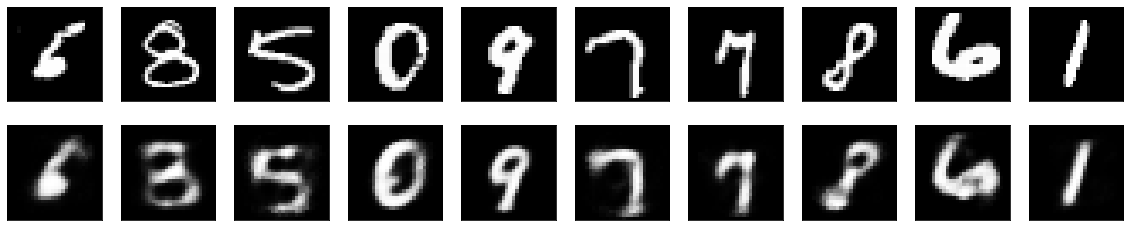

In [10]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# Using TensorFlow backend.

encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

x_data = data.values[:,1:]
y_data = data.label
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.3)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Deep autoencoder

Train on 29400 samples, validate on 12600 samples
Epoch 1/100
29400/29400 [==============================] - 4s 121us/step - loss: 0.4508 - val_loss: 0.2690
Epoch 2/100
29400/29400 [==============================] - 3s 100us/step - loss: 0.2659 - val_loss: 0.2633
Epoch 3/100
29400/29400 [==============================] - 3s 102us/step - loss: 0.2607 - val_loss: 0.2580
Epoch 4/100
29400/29400 [==============================] - 3s 98us/step - loss: 0.2535 - val_loss: 0.2473
Epoch 5/100
29400/29400 [==============================] - 3s 95us/step - loss: 0.2392 - val_loss: 0.2325
Epoch 6/100
29400/29400 [==============================] - 3s 101us/step - loss: 0.2288 - val_loss: 0.2259
Epoch 7/100
29400/29400 [==============================] - 3s 95us/step - loss: 0.2220 - val_loss: 0.2181
Epoch 8/100
29400/29400 [==============================] - 3s 96us/step - loss: 0.2145 - val_loss: 0.2112
Epoch 9/100
29400/29400 [==============================] - 3s 95us/step - loss: 0.2072 - val_loss:

Epoch 77/100
29400/29400 [==============================] - 3s 97us/step - loss: 0.1187 - val_loss: 0.1198
Epoch 78/100
29400/29400 [==============================] - 3s 98us/step - loss: 0.1182 - val_loss: 0.1186
Epoch 79/100
29400/29400 [==============================] - 3s 101us/step - loss: 0.1182 - val_loss: 0.1176
Epoch 80/100
29400/29400 [==============================] - 3s 94us/step - loss: 0.1176 - val_loss: 0.1195
Epoch 81/100
29400/29400 [==============================] - 3s 95us/step - loss: 0.1176 - val_loss: 0.1175
Epoch 82/100
29400/29400 [==============================] - 3s 105us/step - loss: 0.1174 - val_loss: 0.1169
Epoch 83/100
29400/29400 [==============================] - 3s 96us/step - loss: 0.1169 - val_loss: 0.1192
Epoch 84/100
29400/29400 [==============================] - 3s 99us/step - loss: 0.1166 - val_loss: 0.1179
Epoch 85/100
29400/29400 [==============================] - 3s 108us/step - loss: 0.1165 - val_loss: 0.1179
Epoch 86/100
29400/29400 [========

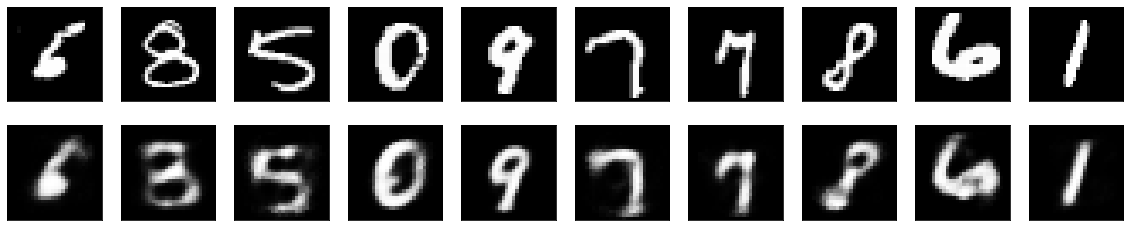

In [11]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()